In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

/Users/aidan.horn/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Problem 1-A: Given matrices A and B, compute and return an expression for A + B.

def problem_1a(A,B):
    return A + B

In [3]:
#Problem 1-B: Given matrices A, B, and C, compute and return AB −C

def problem_1b(A,B,C):
    return A@B - C

In [4]:
#Problem 1-C: Given matrices A, B, and C, return A⊙B+C⊤, where ⊙represents the element-wise (Hadamard)
#             product and ⊤represents matrix transpose

def problem_1c(A,B,C):
    return A*B + C.T

In [5]:
#Probelm 1-D: Given column vectors x and y, compute the inner product of x and y

def problem_1d(x,y):
    return x.T * y

In [6]:
#Problem 1-E: Given square matrix A and column vector x, use np.linalg.solve to compute A−1x. Do
#             not explicitly calculate the matrix inverse itself

def problem_1e(A,x):
    #x = A^-1 @ b
    #np.linalg.solve(A,b) = x = A^-1 @ b
    #solve for b using linalg.solve
    return np.linalg.solve(A,x)

In [7]:
#Problem 1-F: Given square matrix A and row vector x, use np.linalg.solve to compute xA−1
#             Hint: AB = (B⊤A⊤)⊤
def problem_1f(A,x):
    #assume b = A-1x = AB
    #assume x is already transposed becuase x was a column vector in problem 1e
    #use problem 1e and the identity above
    return np.linalg.solve(A.T,x).T

In [8]:
#Problem 1-G: Given matrix A and integer i, return the sum of all the entries in the ith row whose column index
#             is even, i.e., Sum j:j is even  Aij .
def problem_1g(A, i):
    #This works for the most up to date version of numpy but for some reason in this jupyter notebook it will not :(
    return np.sum(A[i], where = [j % 2 == 0 for j in range(len(A[i]))])

In [9]:
#Problem 1-H: Given matrix A and scalars c,d, compute the arithmetic mean over all entries of A that are
#             between c and d (inclusive).
def problem_1h(A, c, d):
    A_greater = A[np.nonzero(A >= c)]
    A_less = A_greater[np.nonzero(A_greater <= d)]
    return np.mean(A_less)

In [10]:
#Problem 1-I: Given an (n×n) matrix A and integer k, return an (n×k) matrix containing the right-eigenvectors
#.            of A corresponding to the k largest eigenvalues of A.
def problem_1i(A, k):
    #assume k <= n
    w,v = np.linalg.eig(A)
    return v[:,:k]

In [11]:
#Problem 1-J: Given a column vector (with n components) x, an integer k, and positive scalars m,s, return an
#.            (n ×k) matrix, each of whose columns is a sample from multidimensional Gaussian distribution
#.            N(x + mz,sI), where z is column vector (with n components) containing all ones and I is the
#             identity matrix.
def problem_1j(x, k, m, s):
    n = len(x)
    z = np.matrix([1]*n).T
    mu = np.ravel((x+m*z))
    I = np.identity(n)
    cov = s*I
    row = np.random.multivariate_normal(mu, cov, size = k)
    return np.matrix(row.T)

In [12]:
#Problem 1-K: Given a matrix A with n rows, return a matrix that results from randomly permuting the
#.            rows (but not the columns) in A.
def problem_1k(A):
    return np.random.permutation(A)

In [13]:
#Problem 1-L: Given a vector x, return a vector y such that each yi = (xi −x)/σ, where x is the
#.            mean (use np.mean) of the elements of x and σ is the standard deviation 
def problem_1l(x):
    return (x - np.mean(x))/np.std(x)

In [14]:
#Problem 1-M: Given an n-vector x and a non-negative integer k, return a n ×k matrix consisting of k copies
#.            of x.
def problem_1m(x, k):
    return np.tile(x,k)

In [15]:
#Problem 1-N: Given an m×n matrix X, compute an n×n matrix D consisting of all pairwise L2 distances
def problem_1n(X):
    return abs(np.tile(X,len(X)) - np.tile(X.T,len(X)))

In [16]:
def test_problem1():
    
    A = np.matrix([[1, 2], [3, 4]])
    B = np.matrix([[1, 1], [2, 2]])
    C = np.matrix([[1, 1], [1, 1]])
    
    x = np.matrix([[1], [2]])
    y = np.matrix([[3], [6]])
    
    i = 1
    
    c = 2
    d = 4
    
    k = 1
    
    m = 2
    s = 0.5
    
    X = np.matrix([[1, 2, 3]])
    
    #Problem 1-A
    try: 
        assert np.allclose(problem_1a(A,B),np.matrix([[2, 3], [5, 6]])), "Problem 1-A: Failed"
        print("Problem 1-A: Passed")
    except:
        print("Manual Review Required: Problem 1-A")
    #Problem 1-B
    try:
        assert np.allclose(problem_1b(A,B,C),np.matrix([[4, 4], [10, 10]])), "Problem 1-B: Failed"
        print("Problem 1-B: Passed")
    except:
        print("Manual Review Required: Problem 1-B")
    #Problem 1-C
    try: 
        assert np.allclose(problem_1c(A,B,C),np.matrix([[6, 6], [12, 12]])), "Problem 1-C: Failed"
        print("Problem 1-C: Passed")
    except:
        print("Manual Review Required: Problem 1-C")
    #Problem 1-D
    try:
        assert np.allclose(problem_1d(x,y), np.matrix([[15]])), "Problem 1-D: Failed"
        print("Problem 1-D: Passed")
    except:
        print("Manual Review Required: Problem 1-D")
    #Problem 1-E
    try:
        assert np.allclose(problem_1e(A,x), A ** -1 @ x, 0.01), "Problem 1-E: Failed"
        print("Problem 1-E: Passed")
    except:
        print("Manual Review Required: Problem 1-E")
    #Problem 1-F
    try:
        assert np.allclose(problem_1f(A,x), x.T @ A ** -1, 0.01), "Problem 1-F: Failed"
        print("Problem 1-F: Passed")
    except:
        print("Manual Review Required: Problem 1-F")
    #Problem 1-G
    try:
        assert np.allclose(problem_1g(A,i), 3), "Problem 1-G: Failed"
        print("Problem 1-G: Passed")
    except:
        print("Manual Review Required: Problem 1-G")
    #Problem 1-H
    try:
        assert np.allclose(problem_1h(A,c,d), 3), "Problem 1-H: Failed"
        print("Problem 1-H: Passed")
    except:
        print("Manual Review Required: Problem 1-H")
    #Problem 1-I
    try:
        assert np.allclose(problem_1i(A,k), np.matrix([[-0.82456484], [ 0.56576746]])), "Problem 1-I: Failed"
        print("Problem 1-I: Passed")
    except:
        print("Manual Review Required: Problem 1-I")
    #Problem 1-J
    try:
        #Assumes that result will usually be within 2 standard deviations (sigma = 0.5) of mean (mu = 2) + x (x = 1,2)
        assert np.allclose(problem_1j(x,k,m,s), np.matrix([[3],[4]]), 1), "Problem 1-J: Failed"
        print("Problem 1-J: Passed")
    except:
        print("Manual Review Required: Problem 1-J")
    #Problem 1-K
    try:
        A_perm = problem_1k(A)
        assert np.array_equal(A_perm, A) or np.array_equal(A_perm, np.matrix([[3, 4], [1, 2]])), "Problem 1-K: Failed"
        print("Problem 1-K: Passed")
    except:
        print("Manual Review Required: Problem 1-K")
    #Problem 1-L
    try:
        assert np.allclose(problem_1l(x),np.matrix([[-1], [1]])), "Problem 1-L: Failed"
        print("Problem 1-L: Passed")
    except:
        print("Manual Review Required: Problem 1-L")
    #Problem 1-M
    try:
        assert np.allclose(problem_1m(x,k),np.matrix([[1], [2]])), "Problem 1-M: Failed"
        print("Problem 1-M: Passed")
    except:
        print("Manual Review Required: Problem 1-M")
    #Problem 1-N
    try:
        assert np.allclose(problem_1n(X),np.matrix([[0, 1, 2], [1, 0, 1], [2, 1, 0]])), "Problem 1-N: Failed"
        print("Problem 1-N: Passed")
    except:
        print("Manual Review Required: Problem 1-N")
        
        
test_problem1()

Problem 1-A: Passed
Problem 1-B: Passed
Problem 1-C: Passed
Problem 1-D: Passed
Problem 1-E: Passed
Problem 1-F: Passed
Manual Review Required: Problem 1-G
Problem 1-H: Passed
Problem 1-I: Passed
Problem 1-J: Passed
Problem 1-K: Passed
Problem 1-L: Passed
Problem 1-M: Passed
Problem 1-N: Passed


## Problem 2

In [17]:
def linear_regression (X_tr, y_tr):

    ss_inv = ((X_tr.T @ X_tr) ** -1)

    w = ss_inv @ X_tr.T @ y_tr
    
    return w

In [18]:
def fMSE(y_hat, ytr):
    n = len(y_hat)
    return 1/(2*n) * np.sum(y_hat - ytr)**2

In [19]:
def train_age_regressor():
    # Load data
    X_tr = np.reshape(np.load("age_regression_Xtr.npy"), (-1, 48*48))

    ytr = np.load("age_regression_ytr.npy")

    X_te = np.reshape(np.load("age_regression_Xte.npy"), (-1, 48*48))

    yte = np.load("age_regression_yte.npy")

    w = linear_regression(X_tr, ytr)
    # Report fMSE cost on the training and testing data (separately)
    ytr_hat = w @ X_tr.T
    
    fMSE_train = fMSE(ytr_hat, ytr)
    
    yte_hat = w @ X_te.T
    
    fMSE_test = fMSE(yte_hat, yte)
    
    return fMSE_train, fMSE_test

In [20]:
train_age_regressor()

(1.014775365100438e+20, 5.107376262943038e+19)

## Problem 3

### a)  Estimating the Parameters of a Probability Distribution

In [21]:
data = np.load("PoissonX.npy")

(array([0.09958333, 0.13908333, 0.17216667, 0.16083333, 0.12075   ,
        0.11141667, 0.019     , 0.00691667, 0.00241667, 0.00116667]),
 array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ]),
 <BarContainer object of 10 artists>)

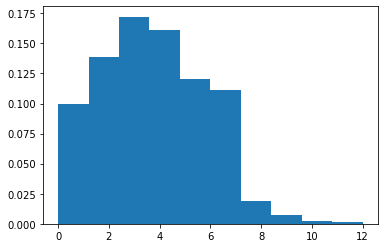

In [22]:
plt.hist(data, density = True)

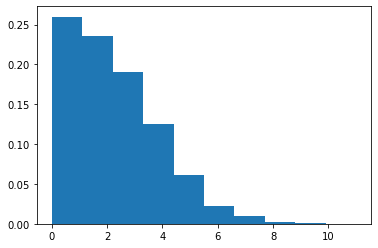

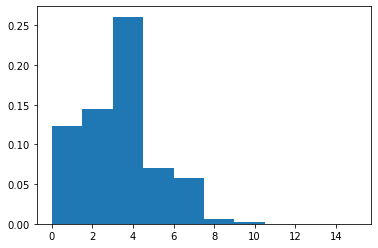

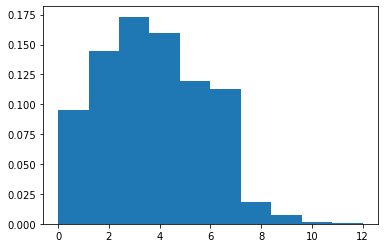

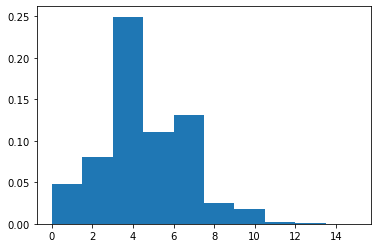

In [23]:
rate_params = [2.5, 3.1, 3.7, 4.3]

for r in rate_params:
    plt.figure()
    x = np.random.poisson(lam = r, size = 10000)
    plt.hist(x, density = True)

***From visual inspection, true rate paramter (lambda) is closest to 3.1***

### b) Conditional Probability Distributions to Represent the Uncertainty of Functions

    i. For which values of x – those with small magnitude, or those with large magnitude – does the corresponding value of y tend to be larger? 


    Examining the normal distribution equation after plugging in the values from our conditional probability distribution:
$f(x)= {\frac{1}{\sigma\sqrt{2\pi}}}e^{- {\frac {1}{2}} (\frac {x-\mu}{\sigma})^2}$

$f(x)= {\frac{1}{2 - \frac{1}{1+e^{-x^2}}\sqrt{2\pi}}}e^{- {\frac {1}{2}} (\frac {x-x}{2 - \frac{1}{1+e^{-x^2}}})^2}$
  
    We see that the exponent becomes zero, leaving us with:
$f(x)= {\frac{1}{2 - \frac{1}{1+e^{-x^2}}\sqrt{2\pi}}}$

    For values of x with larger magnitude, the corresponding y value is larger.

    ii. For which values of x – those with small magnitude, or those with large magnitude – does the uncertainty in the corresponding value of y tend to be larger?
    
    The uncertainty for a normal distribution is expressed at the level of the standard deviation. In this case, the value of our stdev input has a direct relationship with magnitude of x, such that when x has a higher magnitude, the uncertainty in the coresponding value of y also tends to be larger.

## Problem 4

### a)

![alt text](Problem4a.jpg "Title")

### b)

![alt text](Problem4b-1.png "Title")
![alt text](Problem4b-2.png "Title")
![alt text](Problem4b-3.png "Title")